# 🧠 Bag of Words - Understanding & Implementation

## 📌 Introduction
**Yufeng Guo**: Natural language has many challenges that separate it from other data types like images and structured data. It requires a slightly different approach.

Today, we'll explore a foundational concept in natural language processing (NLP) called **Bag of Words (BoW)**. What does it mean? How do we use it to process text? Let's find out! 🚀

## 🗣️ Natural Language & Challenges
Natural language is unique because it has an inherent structure while also being free-form:

- There are many ways to say the same thing.
- Similar words can have different meanings based on context.
- Unlike images (which are naturally represented as matrices), words need to be converted into numerical representations for machine learning models.

## 📊 Transforming Text into Data
In machine learning, data is often represented as **matrices or tensors**:

- **Images**: Naturally represented as matrices.
- **Structured Data**: Spreadsheet values map directly to input matrices.
- **Natural Language**: Needs transformation into numerical form to be usable.

## 🎒 What is Bag of Words (BoW)?
BoW is a method for representing text data numerically. Here's how it works:

1. We create a **vocabulary** (list of unique words from the dataset).
2. Each sentence is represented as a **vector** based on this vocabulary.
3. The position of a word in the vector corresponds to its index in the vocabulary.
4. If a word appears in a sentence, we set the corresponding index in the vector to **1** (or a frequency count).
5. The order of words in the sentence **does not matter**, only their presence or absence.

### 🔍 Example
Let's say our vocabulary consists of 10 words: `['dataframe', 'layer', 'series', 'graph', 'column', 'plot', 'color', 'axes', 'read_csv',  'activation']`

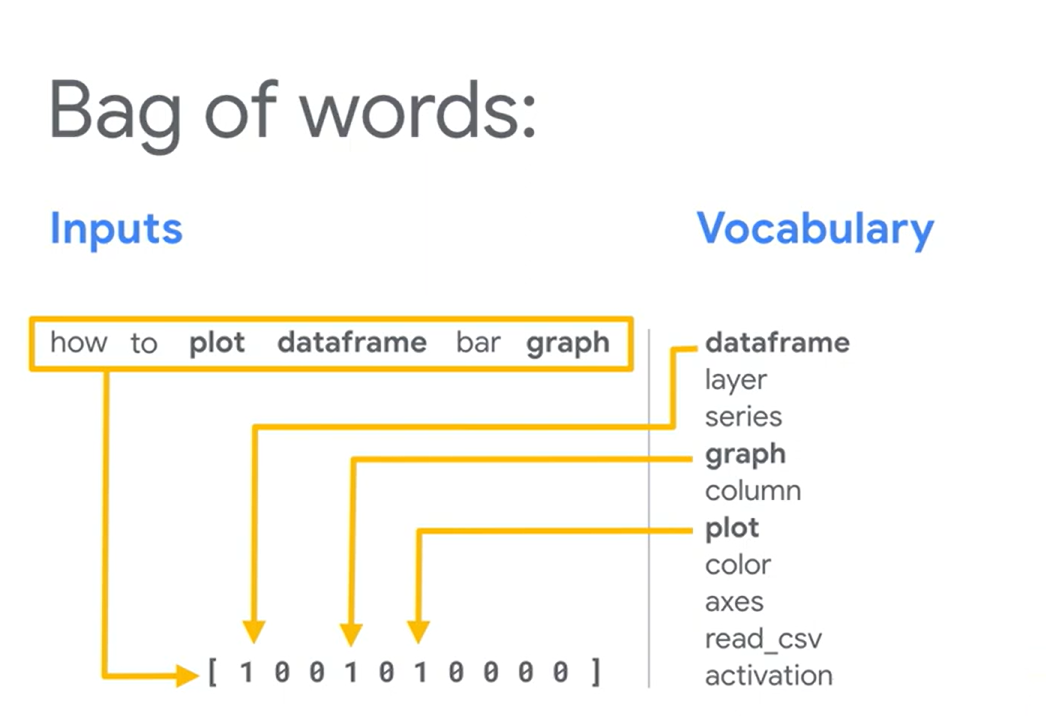

For the sentence: **"how to plot dataframe bar graph"**
- Recognized words: **plot, dataframe, graph**
- Ignored words: **how, to, bar** (not in vocabulary)
- The resulting vector: `[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]`

This representation is called a **bag of words** because it treats words as if they were thrown into a bag without considering their order.

## 🏷️ Preprocessing Labels
Just like the input data, labels also need to be transformed into numerical format:

- If a sentence has multiple labels, we use a **multi-label encoding**.
- A label vector is created where **1** indicates presence of a label and **0** means absence.
- Example: `[1, 0, 1]` (where multiple labels can be true at the same time).

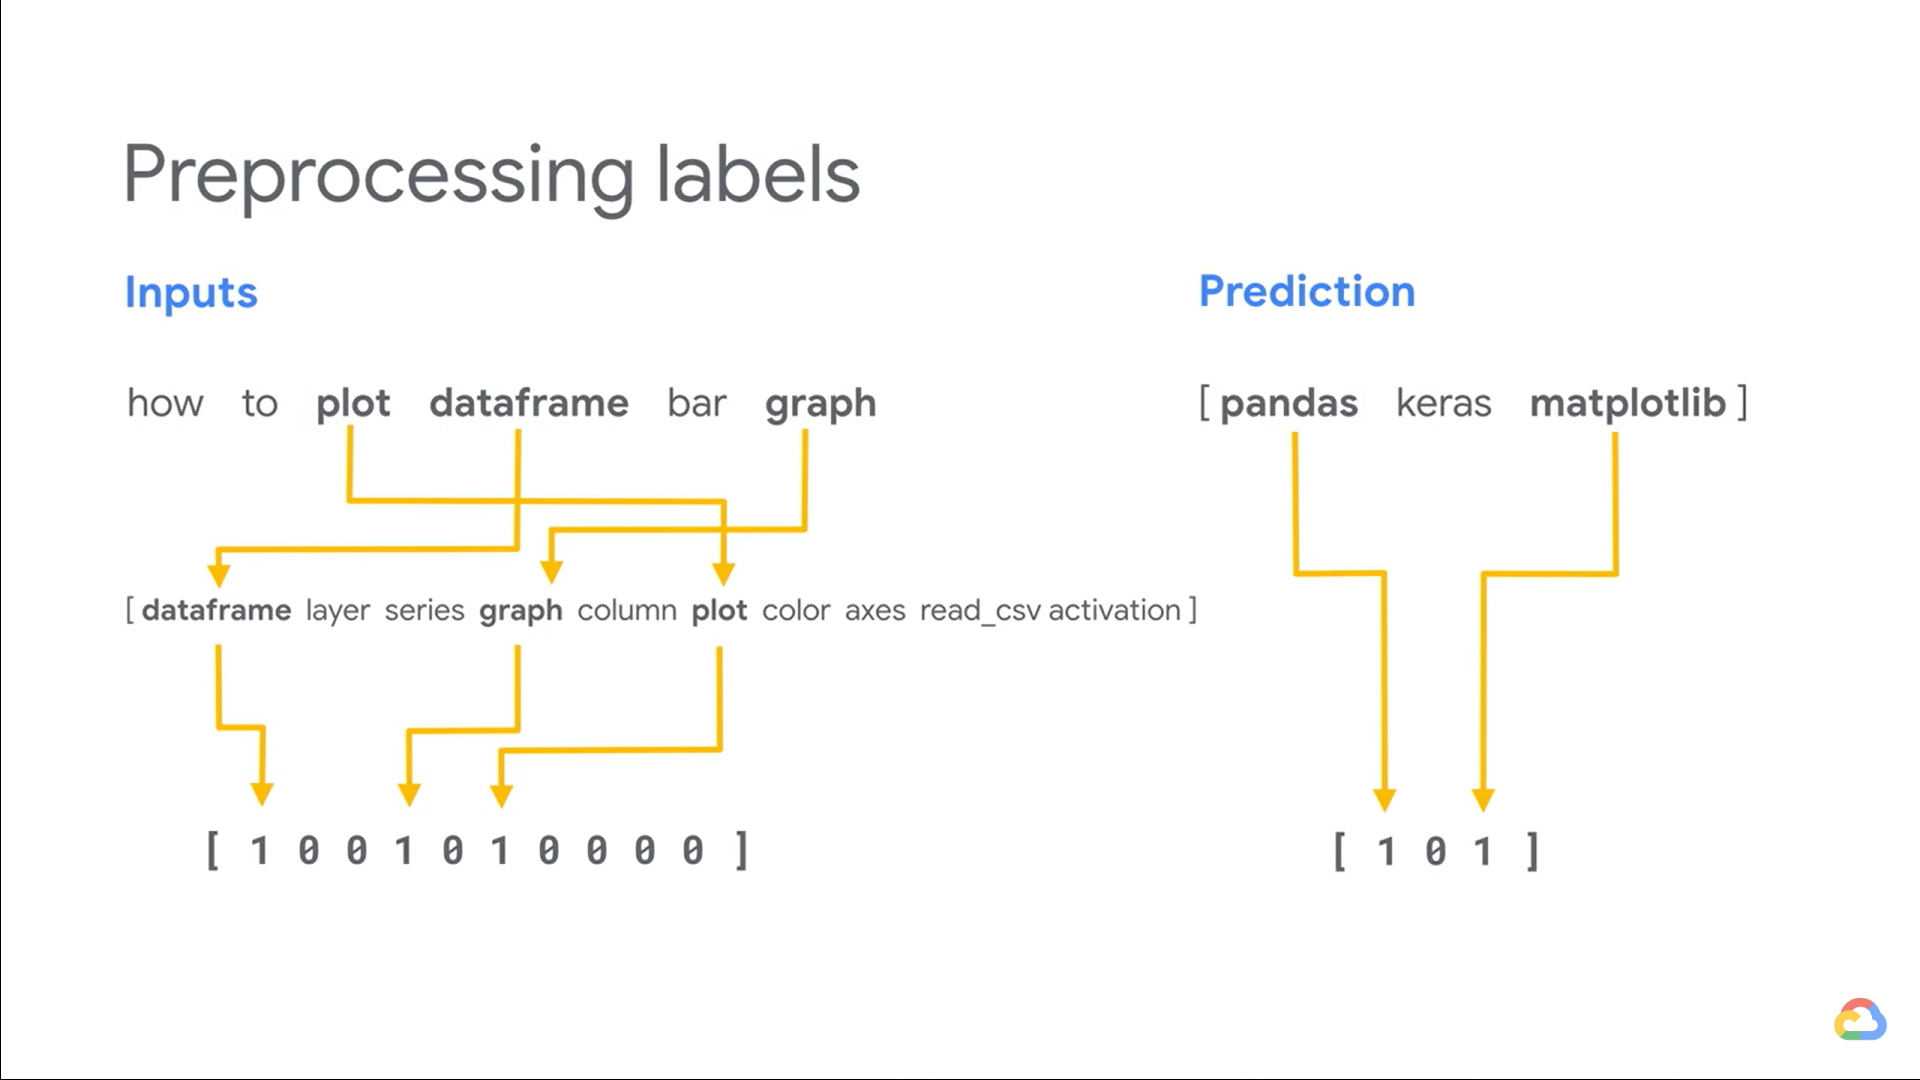

## 🤖 Inputs to Predictions
Once both the **inputs (sentences)** and **outputs (labels)** are converted into numerical format, machine learning models can map one set of numbers to another.

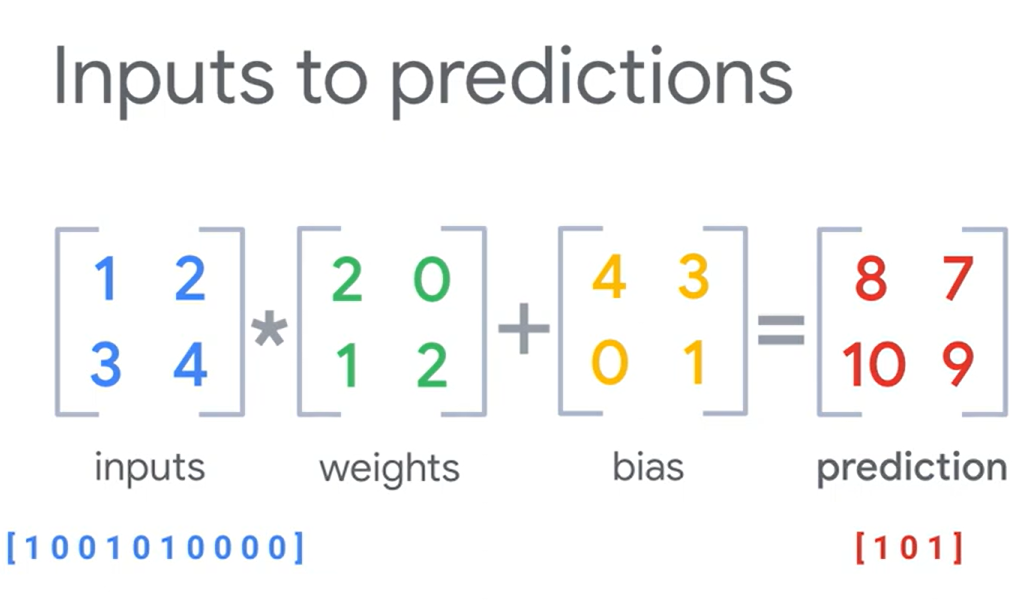

All the complexity is handled in the **preprocessing stage**, where text is transformed into numerical representations.

## 🏗️ Implementing Bag of Words with Keras
Keras provides a **Tokenizer** class that simplifies the BoW process:

1. Define the **vocabulary size** (e.g., 400 most common words).
2. Fit the tokenizer on the training data.
3. Convert sentences into numerical representations based on the learned vocabulary.

```python
from tensorflow.keras.preprocessing.text import Tokenizer

# Define tokenizer
vocab_size = 400
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(training_data)

# Convert sentences to BoW representation
sequences = tokenizer.texts_to_matrix(training_data, mode='binary')
```

## 🏗️ Model Architecture
Once tokenization is complete, the BoW model can be built using a simple **fully connected neural network**:

- **Input**: Binary word presence vectors.
- **Hidden Layers**: Dense layers for feature extraction.
- **Output**:
  - If **single-label classification**: Use **Softmax** activation.
  - If **multi-label classification**: Use **Sigmoid** activation with **binary cross-entropy loss**.

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(vocab_size,)),
    Dense(64, activation='relu'),
    Dense(num_labels, activation='sigmoid') # Use softmax for single-label classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

## 🎯 Key Takeaways
✅ **Bag of Words** is a simple yet powerful way to encode text data.
✅ It **ignores word order** and focuses on word presence.
✅ It can be implemented easily using **Keras Tokenizer**.
✅ Works well for **basic NLP tasks**, though more advanced models like **TF-IDF, Word Embeddings, and Transformers** may be needed for complex tasks.

For more details and code examples, check out the **expanded blog post** linked below! 📖🔗

